/var/folders/n4/xvp216bj3_b9yn7hnlnc3d580000gn/T/ipykernel_14320/139653440.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  formatted_table = greeks_table.applymap(lambda x: f"{x:,.4f}" if isinstance(x, (int, float)) else x)


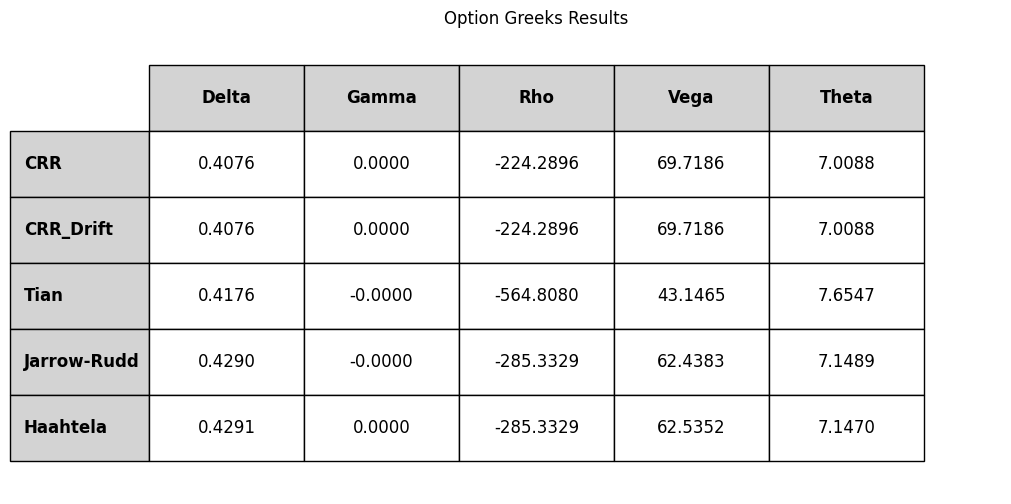

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Data dictionary for the table
data = {
    'Delta': [0.4076, 0.4076, 0.4176, 0.4290, 0.4291],
    'Gamma': [0.0000, 0.0000, -0.0000, -0.0000, 0.0000],
    'Rho': [-224.2896, -224.2896, -564.8080, -285.3329, -285.3329],
    'Vega': [69.7186, 69.7186, 43.1465, 62.4383, 62.5352],
    'Theta': [7.0088, 7.0088, 7.6547, 7.1489, 7.1470]
}

# Row labels
index_labels = ['CRR', 'CRR_Drift', 'Tian', 'Jarrow-Rudd', 'Haahtela']

# Create the DataFrame
greeks_table = pd.DataFrame(data, index=index_labels)

# Format numbers in the DataFrame for consistent decimal alignment
formatted_table = greeks_table.applymap(lambda x: f"{x:,.4f}" if isinstance(x, (int, float)) else x)

# Create the plot with formatted numbers
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('tight')
ax.axis('off')

# Create the table with formatted numbers
table = ax.table(
    cellText=formatted_table.values,
    colLabels=formatted_table.columns,
    rowLabels=formatted_table.index,
    loc='center',
    cellLoc='center',
    colLoc='center'
)
table.auto_set_font_size(False)
table.set_fontsize(12)

# Set equal cell sizes
n_rows, n_cols = formatted_table.shape
cell_width = 1.0 / (n_cols + 1)  # Equal width for each column
cell_height = 1.0 / (n_rows + 2)  # Equal height for each row

for (row, col), cell in table.get_celld().items():
    cell.set_width(cell_width)
    cell.set_height(cell_height)

# Add colors for improved aesthetics
for (row, col), cell in table.get_celld().items():
    if row == 0 or col == -1:
        cell.set_facecolor('#d3d3d3')  # Header background color
        cell.set_text_props(weight='bold')  # Bold headers

# Save and display the table with aligned decimals
plt.title("Option Greeks Results")
plt.savefig('greeks_table_aligned_decimals.png', bbox_inches='tight')
plt.show()
